In [1]:
import sys
sys.path.append('../src/')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from argparse import Namespace
from collections import Counter
sns.set(style="darkgrid")
import os
from sklearn.metrics import classification_report

In [3]:
args = Namespace(
        loc = '/Users/cozek/Documents/MTech/4th Sem/OffensEval/data/TREC',
    )

In [4]:
os.listdir(args.loc)

['eng',
 'iben',
 '.DS_Store',
 'hin',
 'test',
 'release',
 'gold',
 'hin.zip',
 'runs',
 'iben.zip']

In [5]:
os.listdir(
    os.path.join(args.loc,'test')
)

['trac2_eng_test.csv',
 'README.txt',
 'trac2_iben_test.csv',
 'trac2_hin_test.csv']

In [6]:
os.listdir(
    os.path.join(args.loc,'gold')
)

['trac2_iben_gold_a.csv',
 'trac2_iben_gold_b.csv',
 'trac2_hin_gold_a.csv',
 'trac2_eng_gold_a.csv',
 'trac2_hin_gold_b.csv',
 'trac2_eng_gold_b.csv']

In [7]:
os.listdir(
    os.path.join(args.loc,'runs')
)

['hindi_task_a_preds.csv',
 'iben_task_b_preds.csv',
 '.DS_Store',
 'trac_task_b_eng_preds_kaushik.csv',
 'task_a_eng_trac_labels_kaushik.csv',
 'hindi_task_b_preds.csv',
 'iben_task_a_preds.csv']

# Test Sets

In [9]:
ENG_TEST_SET = pd.read_csv(os.path.join(args.loc,'test','trac2_eng_test.csv'))
HIN_TEST_SET = pd.read_csv(os.path.join(args.loc,'test','trac2_hin_test.csv'))
IBEN_TEST_SET = pd.read_csv(os.path.join(args.loc,'test','trac2_iben_test.csv'))

# Helper Functions

In [10]:
def get_analysis(
    gold_csv_loc:str,
    pred_csv_loc:str,
    test_set_df:pd.DataFrame,
    subtask:str
):
    """
    Args:
        gold_csv_loc: Location of gold label csv file
        pred_csv_loc: Location of csv with predicted labels
        test_set_df: Df containing the 'ID' and corresponding text
        subtask: either 'a' or 'b'
    Returns:
        analysis_df: DF containing the columns  Text, True labels as 'true'
            predicted labels as 'pred'
        cross_tab: A pandas crosstab as confusion matrix
    """
    gold_df = pd.read_csv(gold_csv_loc)
    preds_df = pd.read_csv(pred_csv_loc)
    preds_df.rename(
        columns={'Label':'pred'},
        inplace=True,
    )
    temp = pd.merge(
        test_set_df,
        gold_df, on='ID'
    )
    temp.rename(
        columns={f'Sub-task {subtask.upper()}': 'true'},
        inplace=True
    )
    analysis_df = pd.merge(temp, preds_df, on='ID')
    cross_tab = pd.crosstab(
        analysis_df.true , #y_true
        analysis_df.pred , #y_pred
        rownames=['True'], colnames=['Predicted'], margins=True
    )
    return analysis_df, cross_tab

In [11]:
def print_samples(
    analysis_df:pd.DataFrame,
    mistakes:bool=True,
    num_samples:int=5
)-> None:
    """Prints the samples for analysis"""
    
    with pd.option_context('display.max_colwidth', -1): 
        if mistakes: #print misclassifications
            df = analysis_df[analysis_df.true != analysis_df.pred]
            [['Text','true','pred']]
        else: #print correct classifications
            df = analysis_df[analysis_df.true == analysis_df.pred]
            [['Text','true','pred']]
            
        print(df.sample(num_samples))
        
        print('\n',df['Text'].map(len).describe())

# Eng Sub-Task A Analysis

In [12]:
eng_a_analysis_df, eng_a_crosstab = get_analysis(
    gold_csv_loc = os.path.join(args.loc,'gold','trac2_eng_gold_a.csv'),
    pred_csv_loc = os.path.join(args.loc,'runs','task_a_eng_trac_labels_kaushik.csv'),
    test_set_df = ENG_TEST_SET,
    subtask = 'a',
)

In [54]:

print(classification_report(
    y_true = eng_a_analysis_df.true,
    y_pred = eng_a_analysis_df.pred,
    digits=4,
))

              precision    recall  f1-score   support

         CAG     0.5000    0.2857    0.3636       224
         NAG     0.7448    0.9348    0.8290       690
         OAG     0.7718    0.5559    0.6463       286

    accuracy                         0.7233      1200
   macro avg     0.6722    0.5921    0.6130      1200
weighted avg     0.7056    0.7233    0.6986      1200



In [13]:
eng_a_analysis_df

,ID,Text,true,pred
0,YoutubeCorpus37,https://www.youtube.com/watch?v=4iejjszkflo,NAG,NAG
1,C37.1,shame on society & culture trying to justify t...,NAG,CAG
2,C37.2,"just wanna say, there is no gay gene. you can ...",NAG,NAG
3,C37.3,"well, if a one twin struggles with self confid...",NAG,NAG
4,C37.4,i am an identical twin and we are both homosex...,NAG,NAG
...,...,...,...,...
1195,C24.47.4,@hellocreep no fool you comment makes no sense...,NAG,OAG
1196,C24.47.5,at least cows give you milk and other dairy pr...,NAG,CAG
1197,C24.48,that's why law is called an ass..!,NAG,OAG
1198,C24.50,the feminist definition of equality - whatever...,NAG,NAG


In [14]:
eng_a_analysis_df[eng_a_analysis_df.Text=="as long as women vote, they won't change this present situation"]

,ID,Text,true,pred
1180,C24.36,"as long as women vote, they won't change this ...",NAG,NAG


In [15]:
_t = pd.read_csv(os.path.join(args.loc,'gold','trac2_eng_gold_a.csv'))
_t[_t.ID=='C24.36']

,ID,Sub-task A
1180,C24.36,NAG


### Correct Predictions

In [16]:
print_samples(
    analysis_df = eng_a_analysis_df,
    mistakes = False,
    num_samples =5
)

           ID  \
914   C60.694   
760   C8.1386   
1120  C18.84    
121   C52.106   
976   C60.966   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

### Incorrect Predictions

In [17]:
print_samples(
    analysis_df = eng_a_analysis_df,
    mistakes = True,
    num_samples = 5
)

            ID  \
331   C24.142    
764   C8.2151    
333   C24.147    
579   C24.1334   
1148  C24.10     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Text  \
331   i don't even stand near the ladies line in busses or in public transport 🙏  \neven if a lady sits by my side i get up and get to another seat where there's\na man sitting 🙏  \ni stay as far and cautious as much i can.  \njust 1 shout from a 

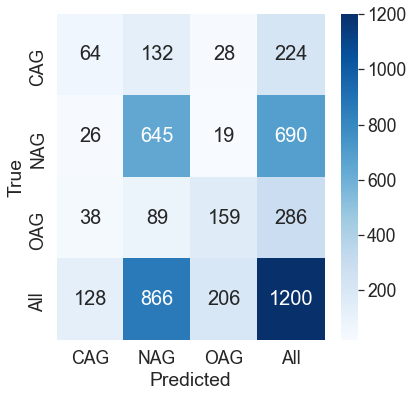

In [18]:
with sns.plotting_context('notebook',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        eng_a_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 20},
    )
    f.savefig(
        'confmats/eng_a_confmat.eps', format='eps', dpi=600
    )

# Eng Sub-Task B Analysis

In [20]:
eng_b_analysis_df, eng_b_crosstab = get_analysis(
    gold_csv_loc = os.path.join(args.loc,'gold','trac2_eng_gold_b.csv'),
    pred_csv_loc = os.path.join(args.loc,'runs','trac_task_b_eng_preds_kaushik.csv'),
    test_set_df = ENG_TEST_SET,
    subtask = 'b',
)
    

In [55]:

print(classification_report(
    y_true = eng_b_analysis_df.true,
    y_pred = eng_b_analysis_df.pred,
    digits=4,
))

              precision    recall  f1-score   support

         GEN     0.5409    0.4914    0.5150       175
        NGEN     0.9145    0.9288    0.9216      1025

    accuracy                         0.8650      1200
   macro avg     0.7277    0.7101    0.7183      1200
weighted avg     0.8600    0.8650    0.8623      1200



In [21]:
eng_b_analysis_df

,ID,Text,true,pred
0,YoutubeCorpus37,https://www.youtube.com/watch?v=4iejjszkflo,NGEN,NGEN
1,C37.1,shame on society & culture trying to justify t...,NGEN,NGEN
2,C37.2,"just wanna say, there is no gay gene. you can ...",NGEN,NGEN
3,C37.3,"well, if a one twin struggles with self confid...",NGEN,NGEN
4,C37.4,i am an identical twin and we are both homosex...,NGEN,GEN
...,...,...,...,...
1195,C24.47.4,@hellocreep no fool you comment makes no sense...,NGEN,NGEN
1196,C24.47.5,at least cows give you milk and other dairy pr...,NGEN,NGEN
1197,C24.48,that's why law is called an ass..!,NGEN,NGEN
1198,C24.50,the feminist definition of equality - whatever...,NGEN,NGEN


### Correct Predictions

In [22]:
print_samples(
    analysis_df = eng_b_analysis_df,
    mistakes = False,
    num_samples =5
)

             ID  \
37    C37.15      
471   C24.786.5   
356   C24.222     
1064  C18.43      
620   C24.1691    

                                                                                                                                                      Text  \
37    interrupting the pulitzer prize winning author? you dumbo burkha                                                                                       
471   @sid chawla  \nfeminism =slut empowerment phase 2  \ntraditionalism =slut empowerment phase 1                                                          
356   2.1k people, who dislike it, are feminists 😊                                                                                                           
1064  such a fine actor by his own instinct 👏👏👏👏                                                                                                             
620   i think only 5% women /girls miss use this think.  \nmostly i have seen india's sons faul

### Incorrect Predictions

In [23]:
print_samples(
    analysis_df = eng_b_analysis_df,
    mistakes = True,
    num_samples =5
)

             ID  \
519  C24.1036.1   
524  C24.1050     
645  C24.1900     
7    C37.5        
525  C24.1051     

                                                                                                                                                                                                                                                                         Text  \
519  yes worldwide women misuse their gender, their beauty and charm to manipulate\nmen. if that also doesn't work, they open up their bra, show off their\ncleavage and make moves to attract men into submission. this is a bitter truth\nthat society doesn't acknowledge.   
524  fuck women pussies mercilessly                                                                                                                                                                                                                                             
645  fucking librandus..                                          

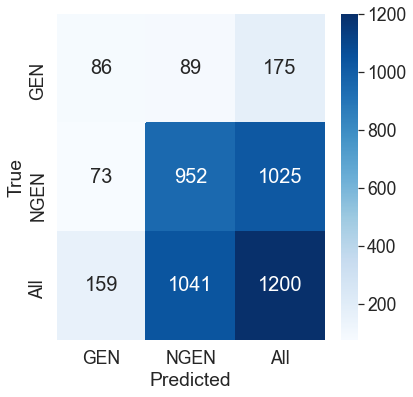

In [24]:
with sns.plotting_context('notebook',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        eng_b_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 20},
    )
    f.savefig(
        'confmats/eng_b_confmat.eps', format='eps', dpi=600
    )

# Hindi Sub-Task A Analysis

In [26]:
hin_a_analysis_df, hin_a_crosstab = get_analysis(
    gold_csv_loc = os.path.join(args.loc,'gold','trac2_hin_gold_a.csv'),
    pred_csv_loc = os.path.join(args.loc,'runs','hindi_task_a_preds.csv'),
    test_set_df = HIN_TEST_SET,
    subtask = 'a',
)
    

In [56]:

print(classification_report(
    y_true = hin_a_analysis_df.true,
    y_pred = hin_a_analysis_df.pred,
    digits=4,
))

              precision    recall  f1-score   support

         CAG     0.5025    0.5288    0.5153       191
         NAG     0.7159    0.7908    0.7515       325
         OAG     0.9203    0.8611    0.8897       684

    accuracy                         0.7892      1200
   macro avg     0.7129    0.7269    0.7188      1200
weighted avg     0.7984    0.7892    0.7927      1200



### Correctly classified

In [27]:
print_samples(
    analysis_df = hin_a_analysis_df,
    mistakes = False,
    num_samples =5
)

            ID  \
583   C24.3674   
586   C24.3744   
211   C24.978    
935   C8.2547    
1099  C8.4148    

                                                                                                            Text  \
583   377 dislikes wale randi k gand mai garam loha                                                                
586   feminism ka galat upyog ho raha hai                                                                          
211   यहाँ तो साबित होने से पहले न्यूज़ पेपर में लड़के का नाम आ जाता है                                              
935   bhag teri maa ki chut..bhag ja yt se..yaha mat haag..jute jaise mu wali..yt pe\nhaag k gandagi mat faila..   
1099  didi tumhari maa ka bhosda :)                                                                                

     true pred  
583   OAG  OAG  
586   CAG  CAG  
211   NAG  NAG  
935   OAG  OAG  
1099  OAG  OAG  

 count    947.000000 
mean     117.600845 
std      186.663316 
min      2.000000   
25%   

### Incorrectly classified

In [28]:
print_samples(
    analysis_df = hin_a_analysis_df,
    mistakes = True,
    num_samples =5
)

             ID  \
109  C24.368      
458  C24.2411.1   
68   C24.104.4    
662  C24.4750.4   
634  C24.4323     

                                                                                                                                                                                                                                                                                                                                                                                                                                                        Text  \
109  😂😂😂😂... जैसी करनी वैसी भरनी। कभी पुरुष बलवान था आज लेडी बलवान है।                                                                                                                                                                                                                                                                                                                                                                               

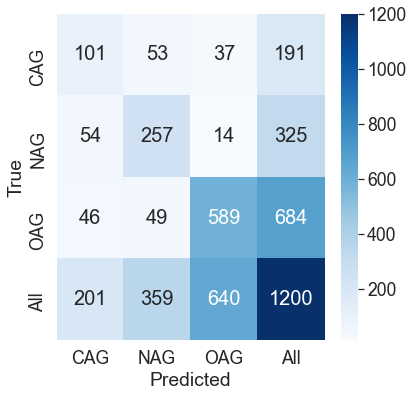

In [29]:
with sns.plotting_context('notebook',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        hin_a_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 20},
    )
    f.savefig(
        'confmats/hin_a_confmat.eps', format='eps', dpi=600
    )

# Hindi Sub-Task B Analysis

In [30]:
hin_b_analysis_df, hin_b_crosstab = get_analysis(
    gold_csv_loc = os.path.join(args.loc,'gold','trac2_hin_gold_b.csv'),
    pred_csv_loc = os.path.join(args.loc,'runs','hindi_task_b_preds.csv'),
    test_set_df = HIN_TEST_SET,
    subtask = 'b',
)
    

In [57]:

print(classification_report(
    y_true = hin_b_analysis_df.true,
    y_pred = hin_b_analysis_df.pred,
    digits=4,
))

              precision    recall  f1-score   support

         GEN     0.8825    0.8342    0.8577       567
        NGEN     0.8584    0.9005    0.8790       633

    accuracy                         0.8692      1200
   macro avg     0.8704    0.8673    0.8683      1200
weighted avg     0.8698    0.8692    0.8689      1200



# Correctly classified

In [31]:
print_samples(
    analysis_df = hin_b_analysis_df,
    mistakes = False,
    num_samples =5
)

             ID  \
946   C8.2681     
1166  C8.4649     
19    C60.543     
1138  C8.4396     
135   C24.531.3   

                                                                                         Text  \
946   fucking fake feminist  \nnikal lav**i pehli fursat me nikal koi jarurat nahi teri idhar   
1166  teri chut chodni hai babu                                                                 
19    nice video  \njio group  \npati dil rani didi ke                                          
1138  madarchod gand marbha aur apne bhap sa pouh ki kya galti kar de                           
135   @dhananjay r hunasgi arre bole toh haan...didnt u read my reply                           

      true  pred  
946   GEN   GEN   
1166  GEN   GEN   
19    NGEN  NGEN  
1138  GEN   GEN   
135   NGEN  NGEN  

 count    1043.000000
mean     116.627996 
std      170.236128 
min      2.000000   
25%      35.000000  
50%      66.000000  
75%      134.500000 
max      2907.000000
Name: Text, dtype:

# Incorrectly classified

In [32]:
print_samples(
    analysis_df = hin_b_analysis_df,
    mistakes = True,
    num_samples =5
)

           ID  \
592  C24.3839   
454  C24.2400   
767  C8.620     
553  C24.3389   
163  C24.701    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

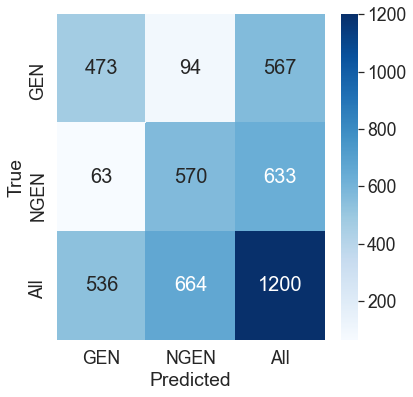

In [33]:
with sns.plotting_context('notebook',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        hin_b_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 20},
    )
    f.savefig(
        'confmats/hin_b_confmat.eps', format='eps', dpi=600
    )

# Bengali Sub-Task A Analysis

In [34]:
iben_a_analysis_df, iben_a_crosstab = get_analysis(
    gold_csv_loc = os.path.join(args.loc,'gold','trac2_iben_gold_a.csv'),
    pred_csv_loc = os.path.join(args.loc,'runs','iben_task_a_preds.csv'),
    test_set_df = IBEN_TEST_SET,
    subtask = 'a',


In [58]:
print(classification_report(
    y_true = iben_a_analysis_df.true,
    y_pred = iben_a_analysis_df.pred,
    digits=4,
))

              precision    recall  f1-score   support

         CAG     0.6053    0.5111    0.5542       225
         NAG     0.8446    0.9087    0.8755       712
         OAG     0.7802    0.7211    0.7495       251

    accuracy                         0.7938      1188
   macro avg     0.7434    0.7136    0.7264      1188
weighted avg     0.7857    0.7938    0.7880      1188



# Correctly classified

In [35]:
print_samples(
    analysis_df = iben_a_analysis_df,
    mistakes = False,
    num_samples =5
)

            ID  \
369   C60.308    
615   C8.12276   
1163  C60.1011   
180   C60.54     
998   C60.782    

                                                                     Text  \
369   dada er por tomar gaan viral hbe 🤭🤭                                   
615   randi                                                                 
1163  😁😁ata last te video banale ata to kat agei bananor katha boss😁😁😍😍😍😍   
180   btw tomar hasi ta khub sundor 🤓                                       
998   0 tka hiro hoa atto poriborton  \nsotti ucit na.                      

     true pred  
369   NAG  NAG  
615   OAG  OAG  
1163  NAG  NAG  
180   NAG  NAG  
998   CAG  CAG  

 count    943.000000
mean     36.625663 
std      45.776491 
min      1.000000  
25%      13.000000 
50%      23.000000 
75%      44.000000 
max      625.000000
Name: Text, dtype: float64


# Incorrectly classified

In [36]:
print_samples(
    analysis_df = iben_a_analysis_df,
    mistakes = True,
    num_samples =5
)

             ID  \
459   C60.717     
1013  C60.805     
132   C53.9       
597   C8.9767.1   
573   C8.7353     

                                                                                              Text  \
459   rani didir chorbi hoya acha                                                                    
1013  ai jonno bole..nijer somman nijer hate..mittha bolte bolte ja khusi bolche\nmohila..           
132   ki ruchi. ma baba thekeo jeno mara geche. just 9th e pore hardly 15 16 hobe. r\nei age i b.a   
597   pînky khanky narsimha venghayi                                                                 
573   faltu feminist                                                                                 

     true pred  
459   CAG  OAG  
1013  CAG  OAG  
132   OAG  NAG  
597   NAG  OAG  
573   CAG  OAG  

 count    245.000000
mean     62.138776 
std      68.474875 
min      4.000000  
25%      21.000000 
50%      39.000000 
75%      73.000000 
max      471.000000
Name: Te

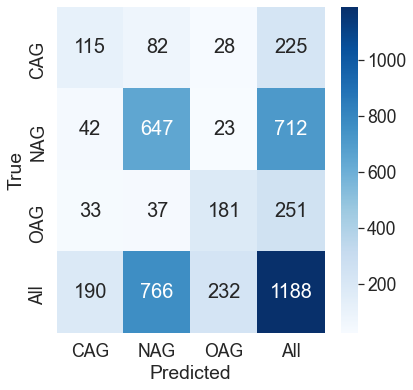

In [37]:
with sns.plotting_context('notebook',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        iben_a_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 20},
    )
    f.savefig(
        'confmats/iben_a_confmat.eps', format='eps', dpi=600
    )

# Bengali Sub-Task B Analysis

In [38]:
iben_b_analysis_df, iben_b_crosstab = get_analysis(
    gold_csv_loc = os.path.join(args.loc,'gold','trac2_iben_gold_b.csv'),
    pred_csv_loc = os.path.join(args.loc,'runs','iben_task_b_preds.csv'),
    test_set_df = IBEN_TEST_SET,
    subtask = 'b',
)

In [59]:
print(classification_report(
    y_true = iben_b_analysis_df.true,
    y_pred = iben_b_analysis_df.pred,
    digits=4,
))

              precision    recall  f1-score   support

         GEN     0.7315    0.7822    0.7560       202
        NGEN     0.9547    0.9412    0.9479       986

    accuracy                         0.9141      1188
   macro avg     0.8431    0.8617    0.8519      1188
weighted avg     0.9168    0.9141    0.9153      1188



## Correctly classified

In [39]:
print_samples(
    analysis_df = iben_b_analysis_df,
    mistakes = False,
    num_samples =5
)

           ID                                                 Text  true  pred
1131  C60.967  last kotha gulo darun dada 🤗🤗..  \nvideo ta darun☺☺  NGEN  NGEN
1064  C60.874  darun hoyeche                                        NGEN  NGEN
979   C60.757  da bhai carry on 👍👍                                  NGEN  NGEN
272   C60.176  ranu pagli chilo r pagli tahkbe                      NGEN  NGEN
732   C16.185  sasti copy...pagli chudi                             GEN   GEN 

 count    1086.000000
mean     41.186004  
std      52.744357  
min      1.000000   
25%      14.000000  
50%      25.000000  
75%      49.000000  
max      625.000000 
Name: Text, dtype: float64


## Incorrectly classified

In [50]:
print_samples(
    analysis_df = iben_b_analysis_df,
    mistakes = True,
    num_samples = 5,  
)

           ID  \
545  C8.5110    
861  C60.590    
471  C60.827    
551  C8.5579    
505  C24.1623   

                                                                                                       Text  \
545  randii bhenkilodi                                                                                        
861  chotto chele ekhane ki bollo plz see <https://youtu.be/4ihwv0pwcdg>                                      
471  aii dom htik aiii bal take amar ager jaygate ferea deo r paro to aro aro video\nkoro aii bal take niye   
551  gand maraooo 🍑🍑                                                                                          
505  madarchood fake case walo ke                                                                             

     true  pred  
545  GEN   NGEN  
861  NGEN  GEN   
471  NGEN  GEN   
551  GEN   NGEN  
505  GEN   NGEN  

 count    102.000000
mean     49.352941 
std      46.666215 
min      8.000000  
25%      15.000000 
50%      33.000000 


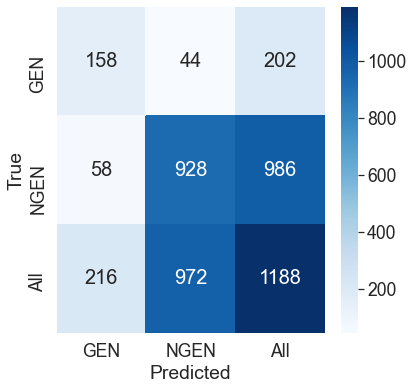

In [48]:
with sns.plotting_context('notebook',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        iben_b_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 20},
    )
    f.savefig(
        'confmats/iben_b_confmat.eps', format='eps', dpi=600
    )